## Introduction:

Flooding is a temporary overflow of water onto land that is normally dry. Floods can result from rain, snow, coastal storms, storm surges, overflows of rivers, and dam failure. Floods can be dangerous. People die by drowning when they don't evacuate before floodwaters come or when they enter floodwaters.arious factors.

Flood predictions require several types of data: The amount of rainfall occurring on a real-time basis. The rate of change in river stage on a real-time basis, which can help indicate the severity and immediacy of the threat.Floods can be caused by a number of natural and human-made factors, including:

Rainfall

Heavy rainfall from tropical weather disturbances or other sources can lead to flooding when rivers overflow into neighboring areas.

Climate change

Climate change can increase the frequency and intensity of floods, which can cause loss of life and damage to property and infrastructure.

Snowmelt

Rapid snowmelt, especially in the spring when warm air influences Alpine areas, can cause flooding, often accompanied by heavy rainfall.

Storm surge

High winds from hurricanes and other storms can push water onshore, causing coastal flooding that can overwhelm low-lying land and lead to loss of life and property.

Collapsed dams

Old or broken dams can fail when water levels rise due to heavy rainfall, unleashing torrents of water downstream.

Deforestation

Trees help to hold soil and water, preventing flooding. When trees are cut down to make way for urbanization, more water runs off into rivers during heavy rainfall, which can lead to flooding.

Other factors

Other factors that can contribute to flooding include improper agricultural practices, inadequate drainage design and maintenance, and construction of settlements in flood plains.

The goal is to predict the probability of a region flooding based on various factors.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('train.csv')
df

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,1117952,3,3,4,10,4,5,5,7,10,...,7,8,7,2,2,1,4,6,4,0.495
1117953,1117953,2,2,4,3,9,5,8,1,3,...,9,4,4,3,7,4,9,4,5,0.480
1117954,1117954,7,3,9,4,6,5,9,1,3,...,5,5,5,5,6,5,5,2,4,0.485
1117955,1117955,7,3,3,7,5,2,3,4,6,...,6,8,5,3,4,6,7,6,4,0.495


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [4]:
df.isnull().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [5]:
df.duplicated().sum()

0

<Axes: >

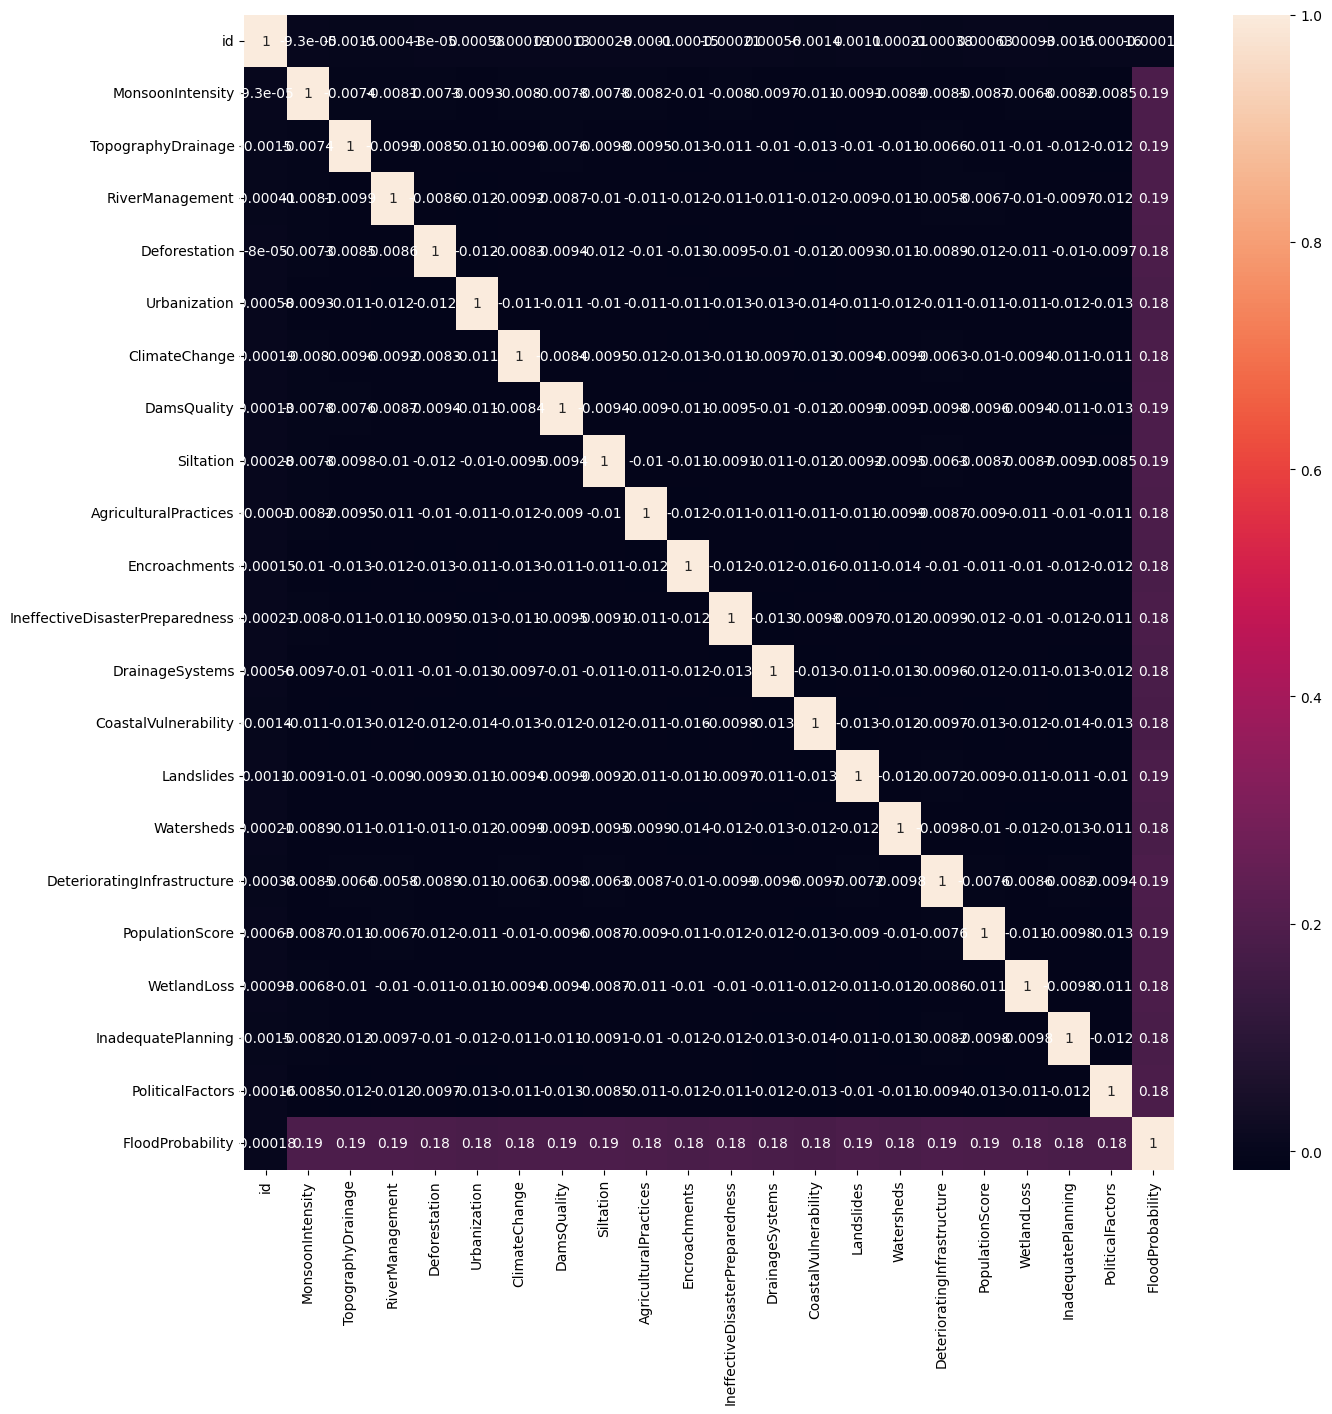

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = True)

In [35]:
x = df.drop(columns= ['id','FloodProbability'])
y = df['FloodProbability']

In [36]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size= 0.8)

In [14]:
model = XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=3)

# Train the model
model.fit(xtrain, ytrain)

# Make predictions
ypred = model.predict(xtest)

# Evaluate the model
mse = mean_squared_error(ytest, ypred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0010051130298283416


In [39]:
params = {'learning_rate':[0.1,0.15,0.2,0.25], 'n_estimators' : [150,200,300,400], 'max_depth':[3,5,7]}
gs = GridSearchCV(estimator = XGBRegressor(),
    param_grid = params,
    n_jobs= -1,
    cv = 3)
gs.fit(x, y)
gs.best_params_

{'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 400}

In [ ]:
{'learning_rate': 0.25, 'max_depth': 3, 'n_estimators': 200}

In [40]:
gs.best_score_

0.8378097118070417

In [41]:
model = XGBRegressor(**gs.best_params_)

# Train the model
model.fit(xtrain, ytrain)

# Make predictions
ypred = model.predict(xtest)

# Evaluate the model
mse = mean_squared_error(ytest, ypred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0004218595417568088


In [42]:
model = XGBRegressor(**gs.best_params_)

# Train the model
model.fit(x, y)

# Make predictions
ypred = model.predict(xtest)

# Evaluate the model
mse = mean_squared_error(ytest, ypred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0004177540396637528


In [45]:
test = pd.read_csv('test.csv')
test

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745300,1863257,5,4,8,3,5,4,4,5,5,...,5,6,1,3,5,6,4,4,6,6
745301,1863258,4,4,2,12,4,3,4,3,5,...,3,7,4,4,3,5,5,3,5,4
745302,1863259,5,7,9,5,5,6,7,5,5,...,6,11,3,11,4,5,9,5,5,4
745303,1863260,4,7,6,3,5,2,3,8,6,...,6,6,8,6,2,3,8,7,5,5


In [43]:
test = test.drop(columns= 'id')

In [44]:
predfinal = model.predict(test)

In [46]:
test_pred = pd.DataFrame(predfinal,index = test["id"])
final_test  = test_pred.reset_index()
final_test.rename(columns={0:"FloodProbability"},inplace = True)
final_test.to_csv("sub.csv")